# Lab 7: Handling Missing Text Data with Transformer-based Small Language Models (SLMs)
## Step 1: Setup Colab Environment
Run this cell to install necessary libraries.
`!pip install transformers missingno`

## Step 2: Create a Dataset with Missing Values
Let's prepare a simple text-based dataset to illustrate missing data.

In [1]:
import pandas as pd
import numpy as np

# Example dataset with missing textual data
data = {
    'Review': ['This place is wonderful!', np.nan, 'I feel', 'Service was', np.nan],
    'Sentiment': ['positive', 'neutral', np.nan, 'negative', 'neutral']
}

df = pd.DataFrame(data)
df


,Review,Sentiment
0,This place is wonderful!,positive
1,NaN,neutral
2,I feel,NaN
3,Service was,negative
4,NaN,neutral


## Step 3: Visualizing Missing Data
Use missingno to visualize missingness clearly.

<Axes: >

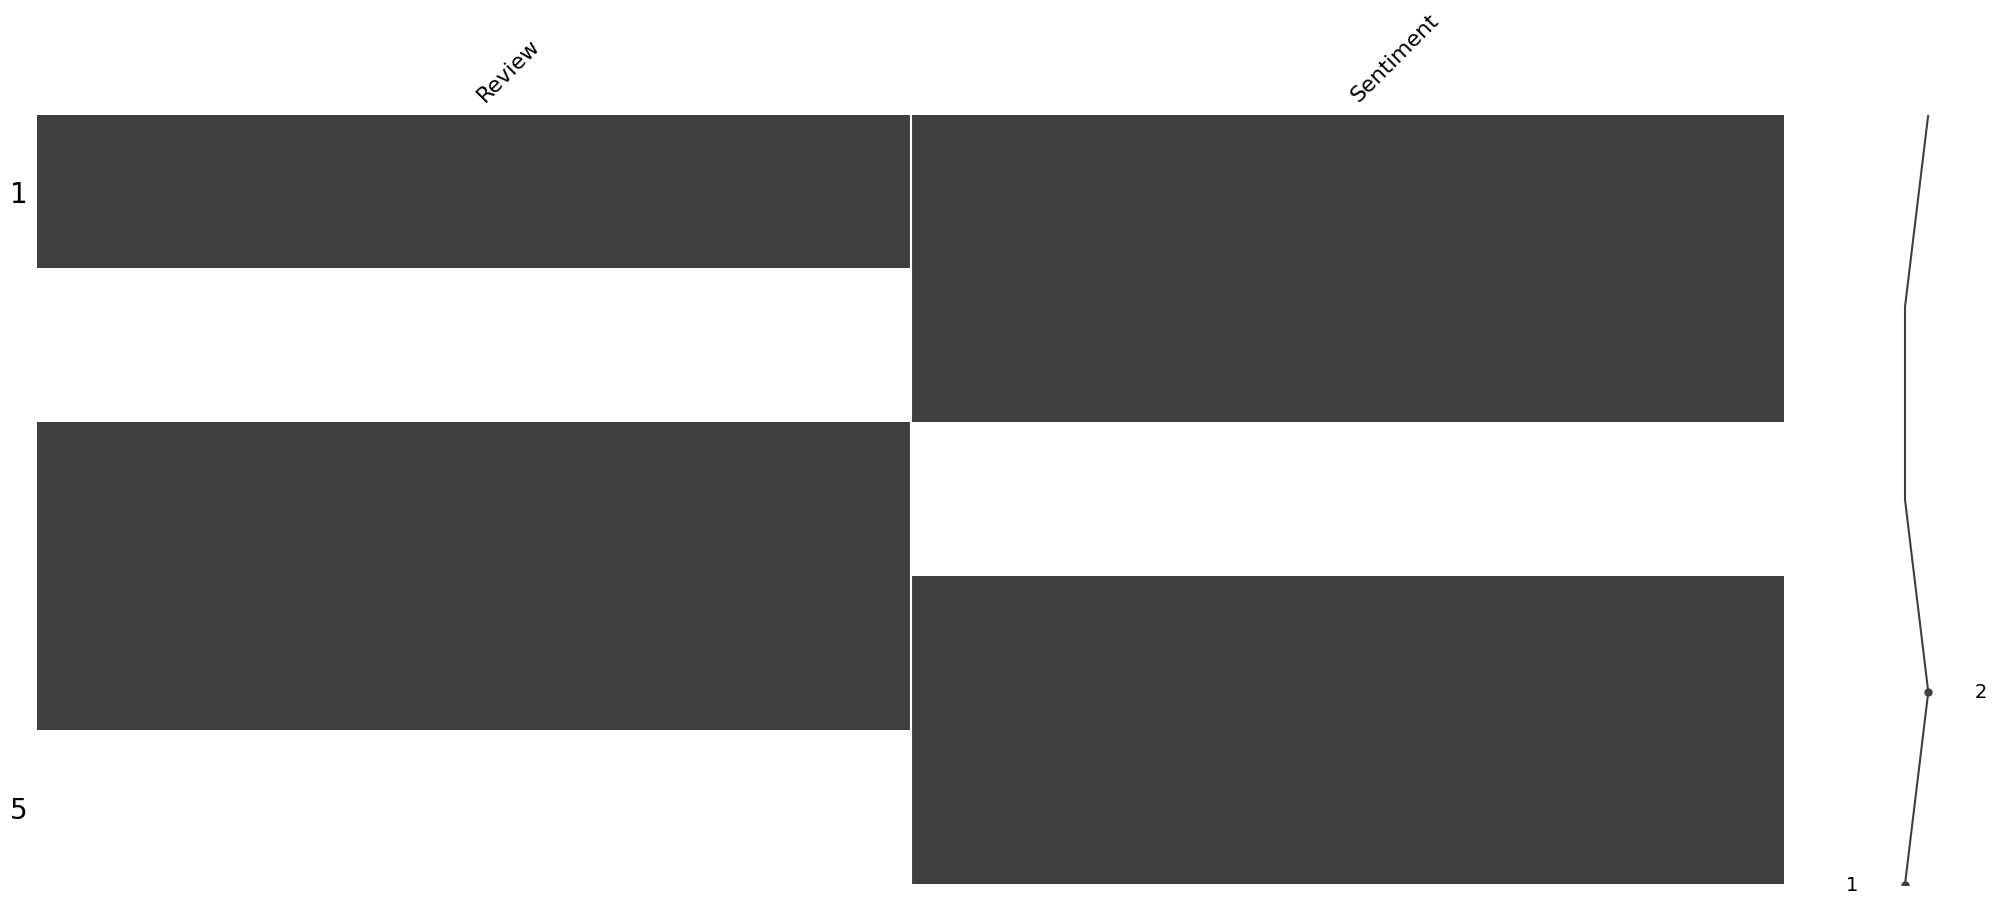

In [2]:
import missingno as msno
msno.matrix(df)

## Step 4: Load a Small Language Model (SLM)
Load a lightweight language model suitable for quick inference on Colab.

In [3]:
from transformers import pipeline

# Load a small language model (BERT-tiny)
fill_mask = pipeline('fill-mask', model='prajjwal1/bert-tiny')

config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Khor Kean Teng\.cache\huggingface\hub\models--prajjwal1--bert-tiny. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Device set to use cpu


## Step 5: Demonstrate Simple Masked Prediction
See how the model fills in masked words:

In [4]:
text = "The service here is [MASK]."
predictions = fill_mask(text)
predictions

[{'score': 0.09238065034151077,
  'token': 2182,
  'token_str': 'here',
  'sequence': 'the service here is here.'},
 {'score': 0.0424373485147953,
  'token': 2045,
  'token_str': 'there',
  'sequence': 'the service here is there.'},
 {'score': 0.03525494784116745,
  'token': 2651,
  'token_str': 'today',
  'sequence': 'the service here is today.'},
 {'score': 0.026209425181150436,
  'token': 2085,
  'token_str': 'now',
  'sequence': 'the service here is now.'},
 {'score': 0.018574170768260956,
  'token': 2188,
  'token_str': 'home',
  'sequence': 'the service here is home.'}]

## Step 6: Impute Missing Values using the SLM
Define a function to impute missing textual entries.

In [5]:
def slm_impute(text, sentiment, slm_pipeline):
    if pd.isna(text):
        prompt = f"The sentiment of this review is {sentiment}, it is [MASK]."
        prediction = slm_pipeline(prompt)[0]['token_str']
        return prediction
    return text

# Apply imputation
df['Review'] = df.apply(lambda row: slm_impute(row['Review'], row['Sentiment'], fill_mask), axis=1)
df

,Review,Sentiment
0,This place is wonderful!,positive
1,unclear,neutral
2,I feel,NaN
3,Service was,negative
4,unclear,neutral


In [6]:

df['Sentiment'] = df.apply(lambda row: slm_impute(row['Sentiment'], row['Review'], fill_mask), axis=1)
df

,Review,Sentiment
0,This place is wonderful!,positive
1,unclear,neutral
2,I feel,true
3,Service was,negative
4,unclear,neutral
